In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)




In [2]:
import metapredict as meta
from sparrow import Protein

from finches.frontend import mpipi_frontend
from finches.forcefields.mPiPi import mPiPi_model
from finches import epsilon_calculation



## Manually defined things
Define a few things here which may be useful?

In [3]:

# med sequence (not a TF so not in the dataset...)
med1 = 'MKAQGETEESEKLSKMSSLLERLHAKFNQNRPWSETIKLVRQVMEKRVVMSSGGHQHLVSCLETLQKALKVTSLPAMTDRLESIARQNGLGSHLSASGTECYITSDMFYVEVQLDPAGQLCDVKVAHHGENPVSCPELVQQLREKNFDEFSKHLKGLVNLYNLPGDNKLKTKMYLALQSLEQDLSKMAIMYWKATNAGPLDKILHGSVGYLTPRSGGHLMNLKYYVSPSDLLDDKTASPIILHENNVSRSLGMNASVTIEGTSAVYKLPIAPLIMGSHPVDNKWTPSFSSITSANSVDLPACFFLKFPQPIPVSRAFVQKLQNCTGIPLFETQPTYAPLYELITQFELSKDPDPIPLNHNMRFYAALPGQQHCYFLNKDAPLPDGRSLQGTLVSKITFQHPGRVPLILNLIRHQVAYNTLIGSCVKRTILKEDSPGLLQFEVCPLSESRFSVSFQHPVNDSLVCVVMDVQDSTHVSCKLYKGLSDALICTDDFIAKVVQRCMSIPVTMRAIRRKAETIQADTPALSLIAETVEDMVKKNLPPASSPGYGMTTGNNPMSGTTTPTNTFPGGPITTLFNMSMSIKDRHESVGHGEDFSKVSQNPILTSLLQITGNGGSTIGSSPTPPHHTPPPVSSMAGNTKNHPMLMNLLKDNPAQDFSTLYGSSPLERQNSSSGSPRMEICSGSNKTKKKKSSRLPPEKPKHQTEDDFQRELFSMDVDSQNPIFDVNMTADTLDTPHITPAPSQCSTPPTTYPQPVPHPQPSIQRMVRLSSSDSIGPDVTDILSDIAEEASKLPSTSDDCPAIGTPLRDSSSSGHSQSTLFDSDVFQTNNNENPYTDPADLIADAAGSPSSDSPTNHFFHDGVDFNPDLLNSQSQSGFGEEYFDESSQSGDNDDFKGFASQALNTLGVPMLGGDNGETKFKGNNQADTVDFSIISVAGKALAPADLMEHHSGSQGPLLTTGDLGKEKTQKRVKEGNGTSNSTLSGPGLDSKPGKRSRTPSNDGKSKDKPPKRKKADTEGKSPSHSSSNRPFTPPTSTGGSKSPGSAGRSQTPPGVATPPIPKITIQIPKGTVMVGKPSSHSQYTSSGSVSSSGSKSHHSHSSSSSSSASTSGKMKSSKSEGSSSSKLSSSMYSSQGSSGSSQSKNSSQSGGKPGSSPITKHGLSSGSSSTKMKPQGKPSSLMNPSLSKPNISPSHSRPPGGSDKLASPMKPVPGTPPSSKAKSPISSGSGGSHMSGTSSSSGMKSSSGLGSSGSLSQKTPPSSNSCTASSSSFSSSGSSMSSSQNQHGSSKGKSPSRNKKPSLTAVIDKLKHGVVTSGPGGEDPLDGQMGVSTNSSSHPMSSKHNMSGGEFQGKREKSDKDKSKVSTSGSSVDSSKKTSESKNVGSTGVAKIIISKHDGGSPSIKAKVTLQKPGESSGEGLRPQMASSKNYGSPLISGSTPKHERGSPSHSKSPAYTPQNLDSESESGSSIAEKSYQNSPSSDDGIRPLPEYSTEKHKKHKKEKKKVKDKDRDRDRDKDRDKKKSHSIKPESWSKSPISSDQSLSMTSNTILSADRPSRLSPDFMIGEEDDDLMDVALIGN'

# IDR 
med1_idr = med1[537:]

# IDRs from med14 and med15; nb med15 seems to generally be the most attractive
med14_idr = 'QDARRRSVNEDDNPPSPIGGDMMDSLISQLQPPPQQQPFPKQPGTSGAYPLTSPPTSYHSTVNQSPSMMHTQSPGNLHAASSPSGALRAPSPASFVPTPPPSSHGISIGPGASFASPHGTLDPSSPYTMVSPSGRAGNWPGSPQVSGPSPAARMPGMSPANPSLHSPVPDASHSPRAGTSSQTMPTNMPPPRKLPQRSWAAS'
med15_idr = 'KSQASVSDPMNALQSLTGGPAAGAAGIGMPPRGPGQSLGGMGSLGAMGQPMSLSGQPPPGTSGMAPHSMAVVSTATPQTQLQLQQVALQQQQQQQQFQQQQQAALQQQQQQQQQQQFQAQQSAMQQQFQAVVQQQQQLQQQQQQQQHLIKLHHQNQQQIQQQQQQLQRIAQLQLQQQQQQQQQQQQQQQQALQAQPPIQQPPMQQPQPPPSQALPQQLQQMHHTQHHQPPPQPQQPPVAQNQPSQLPPQSQTQPLVSQAQALPGQMLYTQPPLKFVRAPMVVQQPPVQPQVQQQQTAVQTAQAAQMVAPGVQMITEALAQGGMHIRARFPPTTAVSAIPSSSIPLGRQPMAQVSQSSLPMLSSPSPGQQVQTPQSMPPPPQPSPQPGQPSSQPNSNVSSGPAPSPSSFLPSPSPQPSQSPVTARTPQNFSVPSPGPLNTPVNPSSVMSPAGSSQA'



## Example of predicted homotypic IDR-mediated interaction
Visualize med1-idr interaction with itself

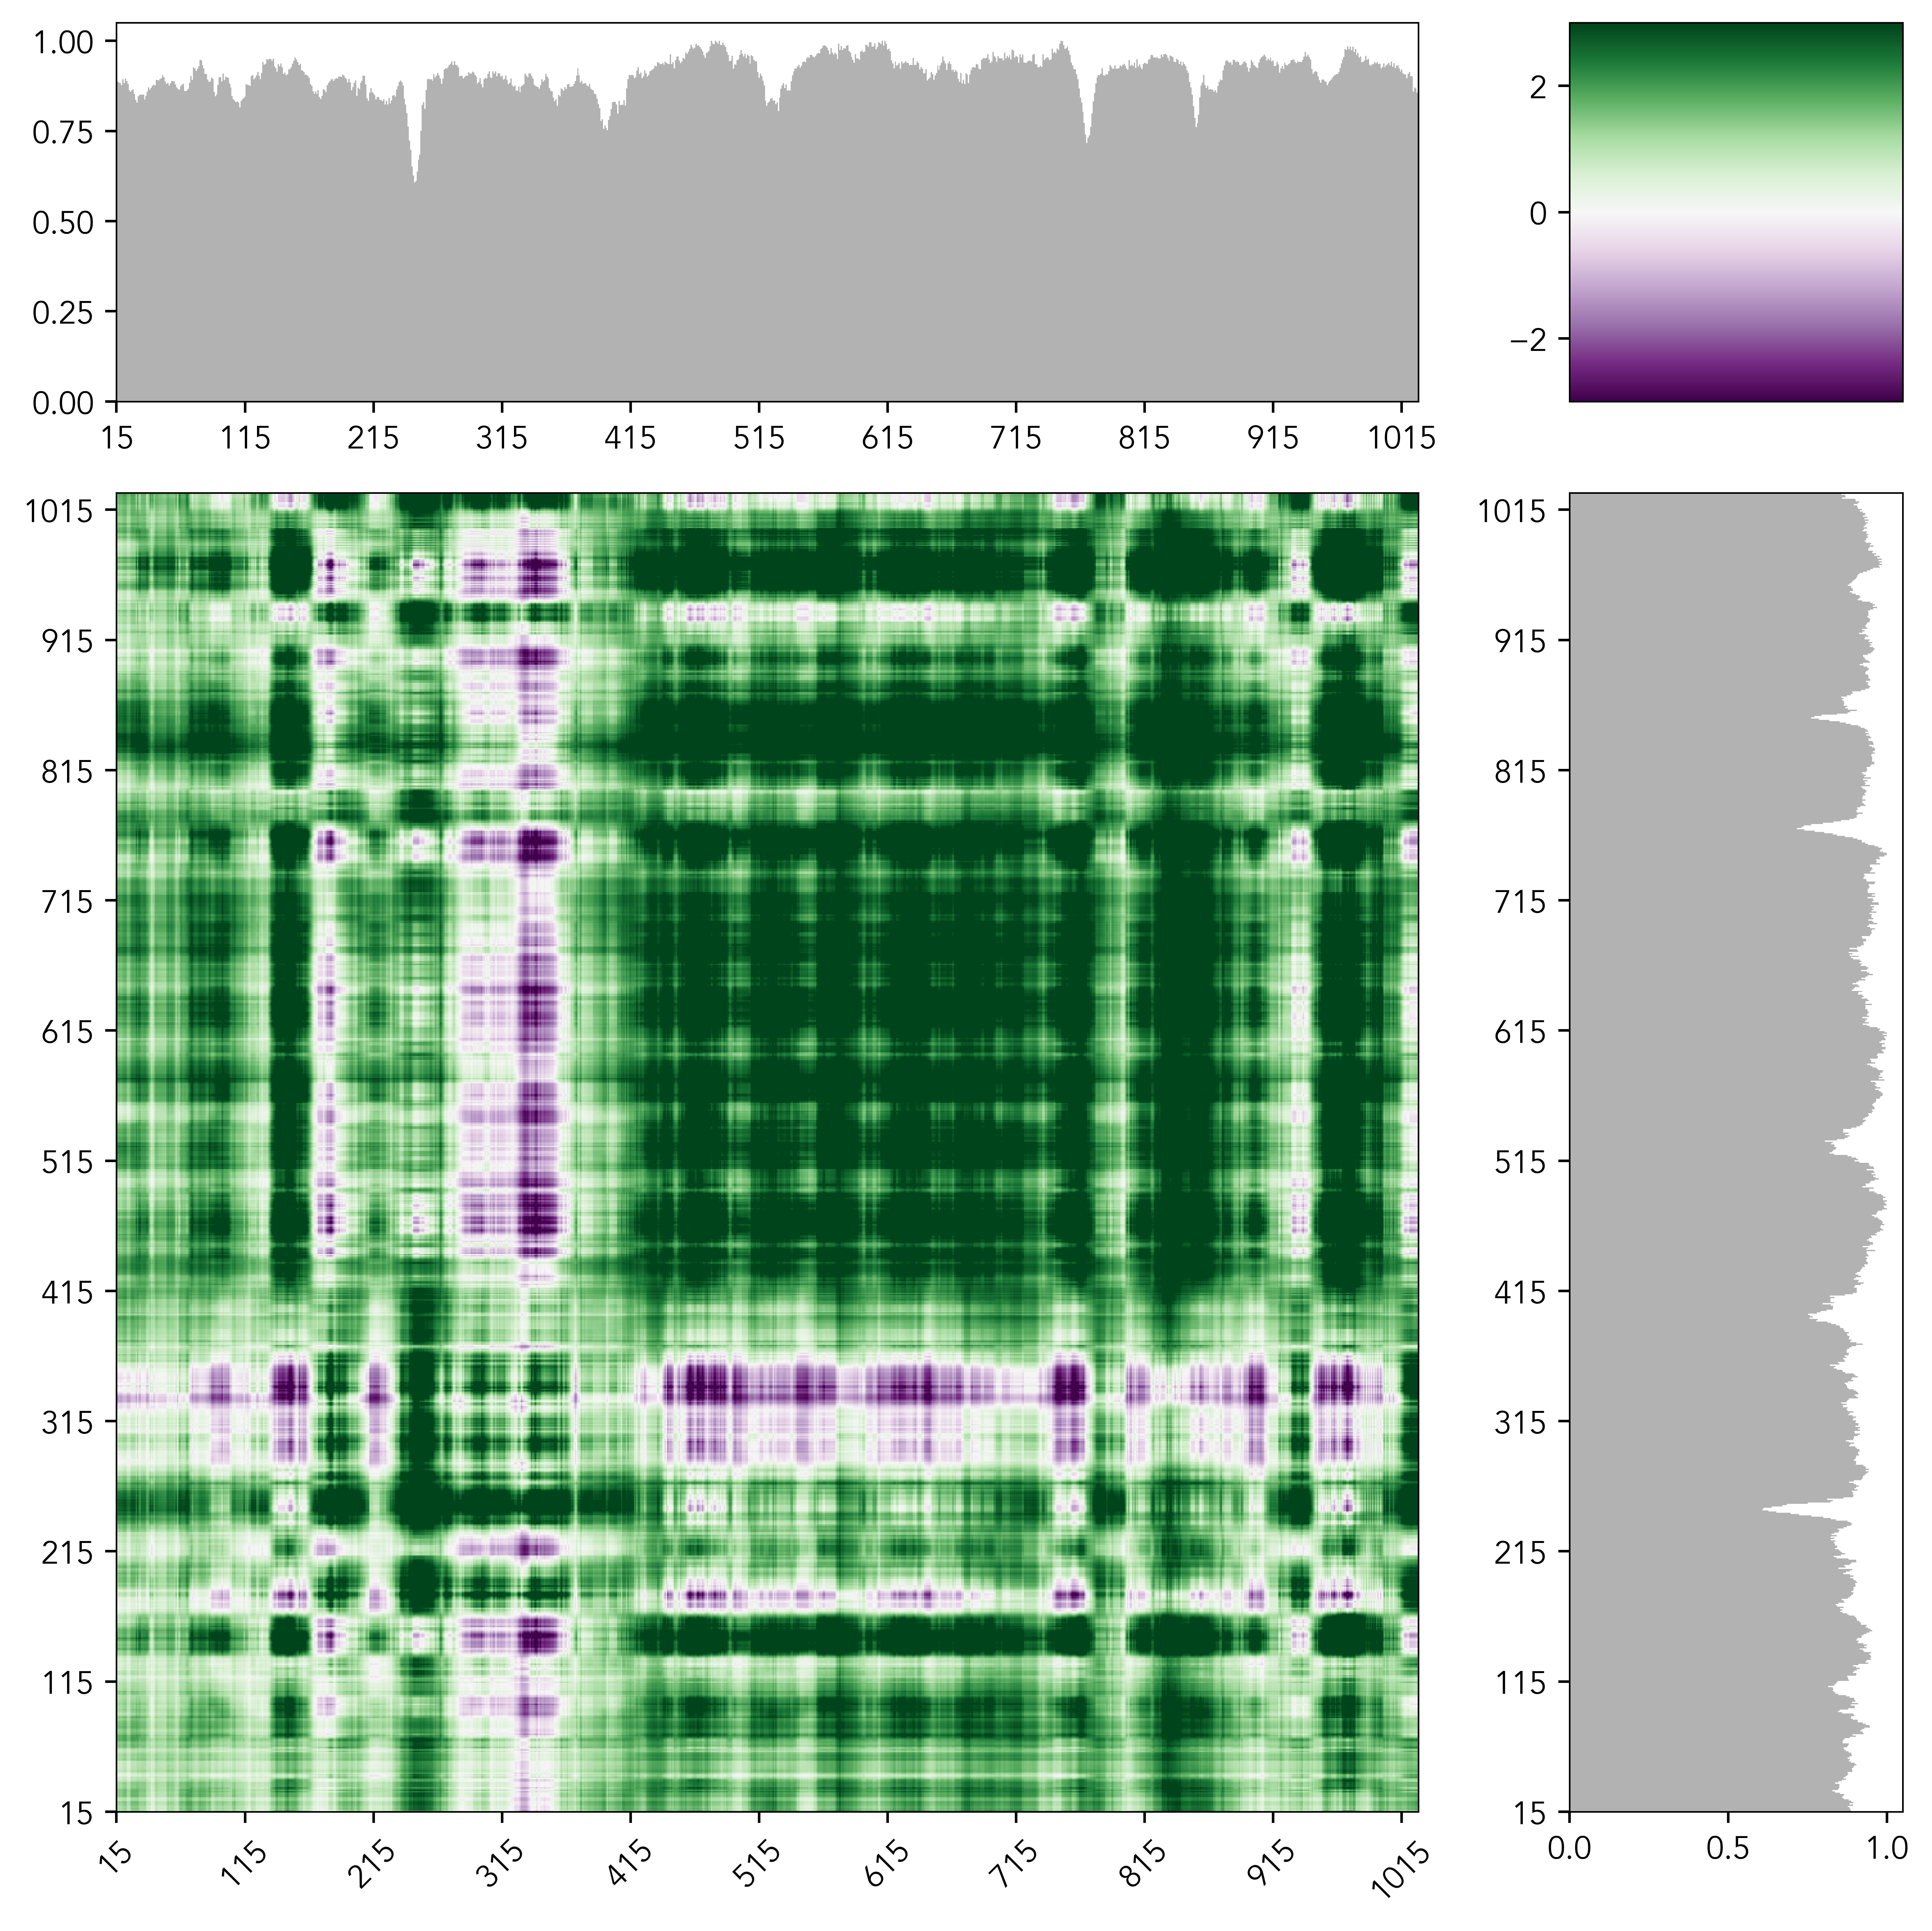

In [4]:
X = mpipi_frontend.interaction_figure(med1_idr, med1_idr, tic_frequency=100)


## Example of heterotypic interaction
Visualize med1 IDR vs. med15 IDR

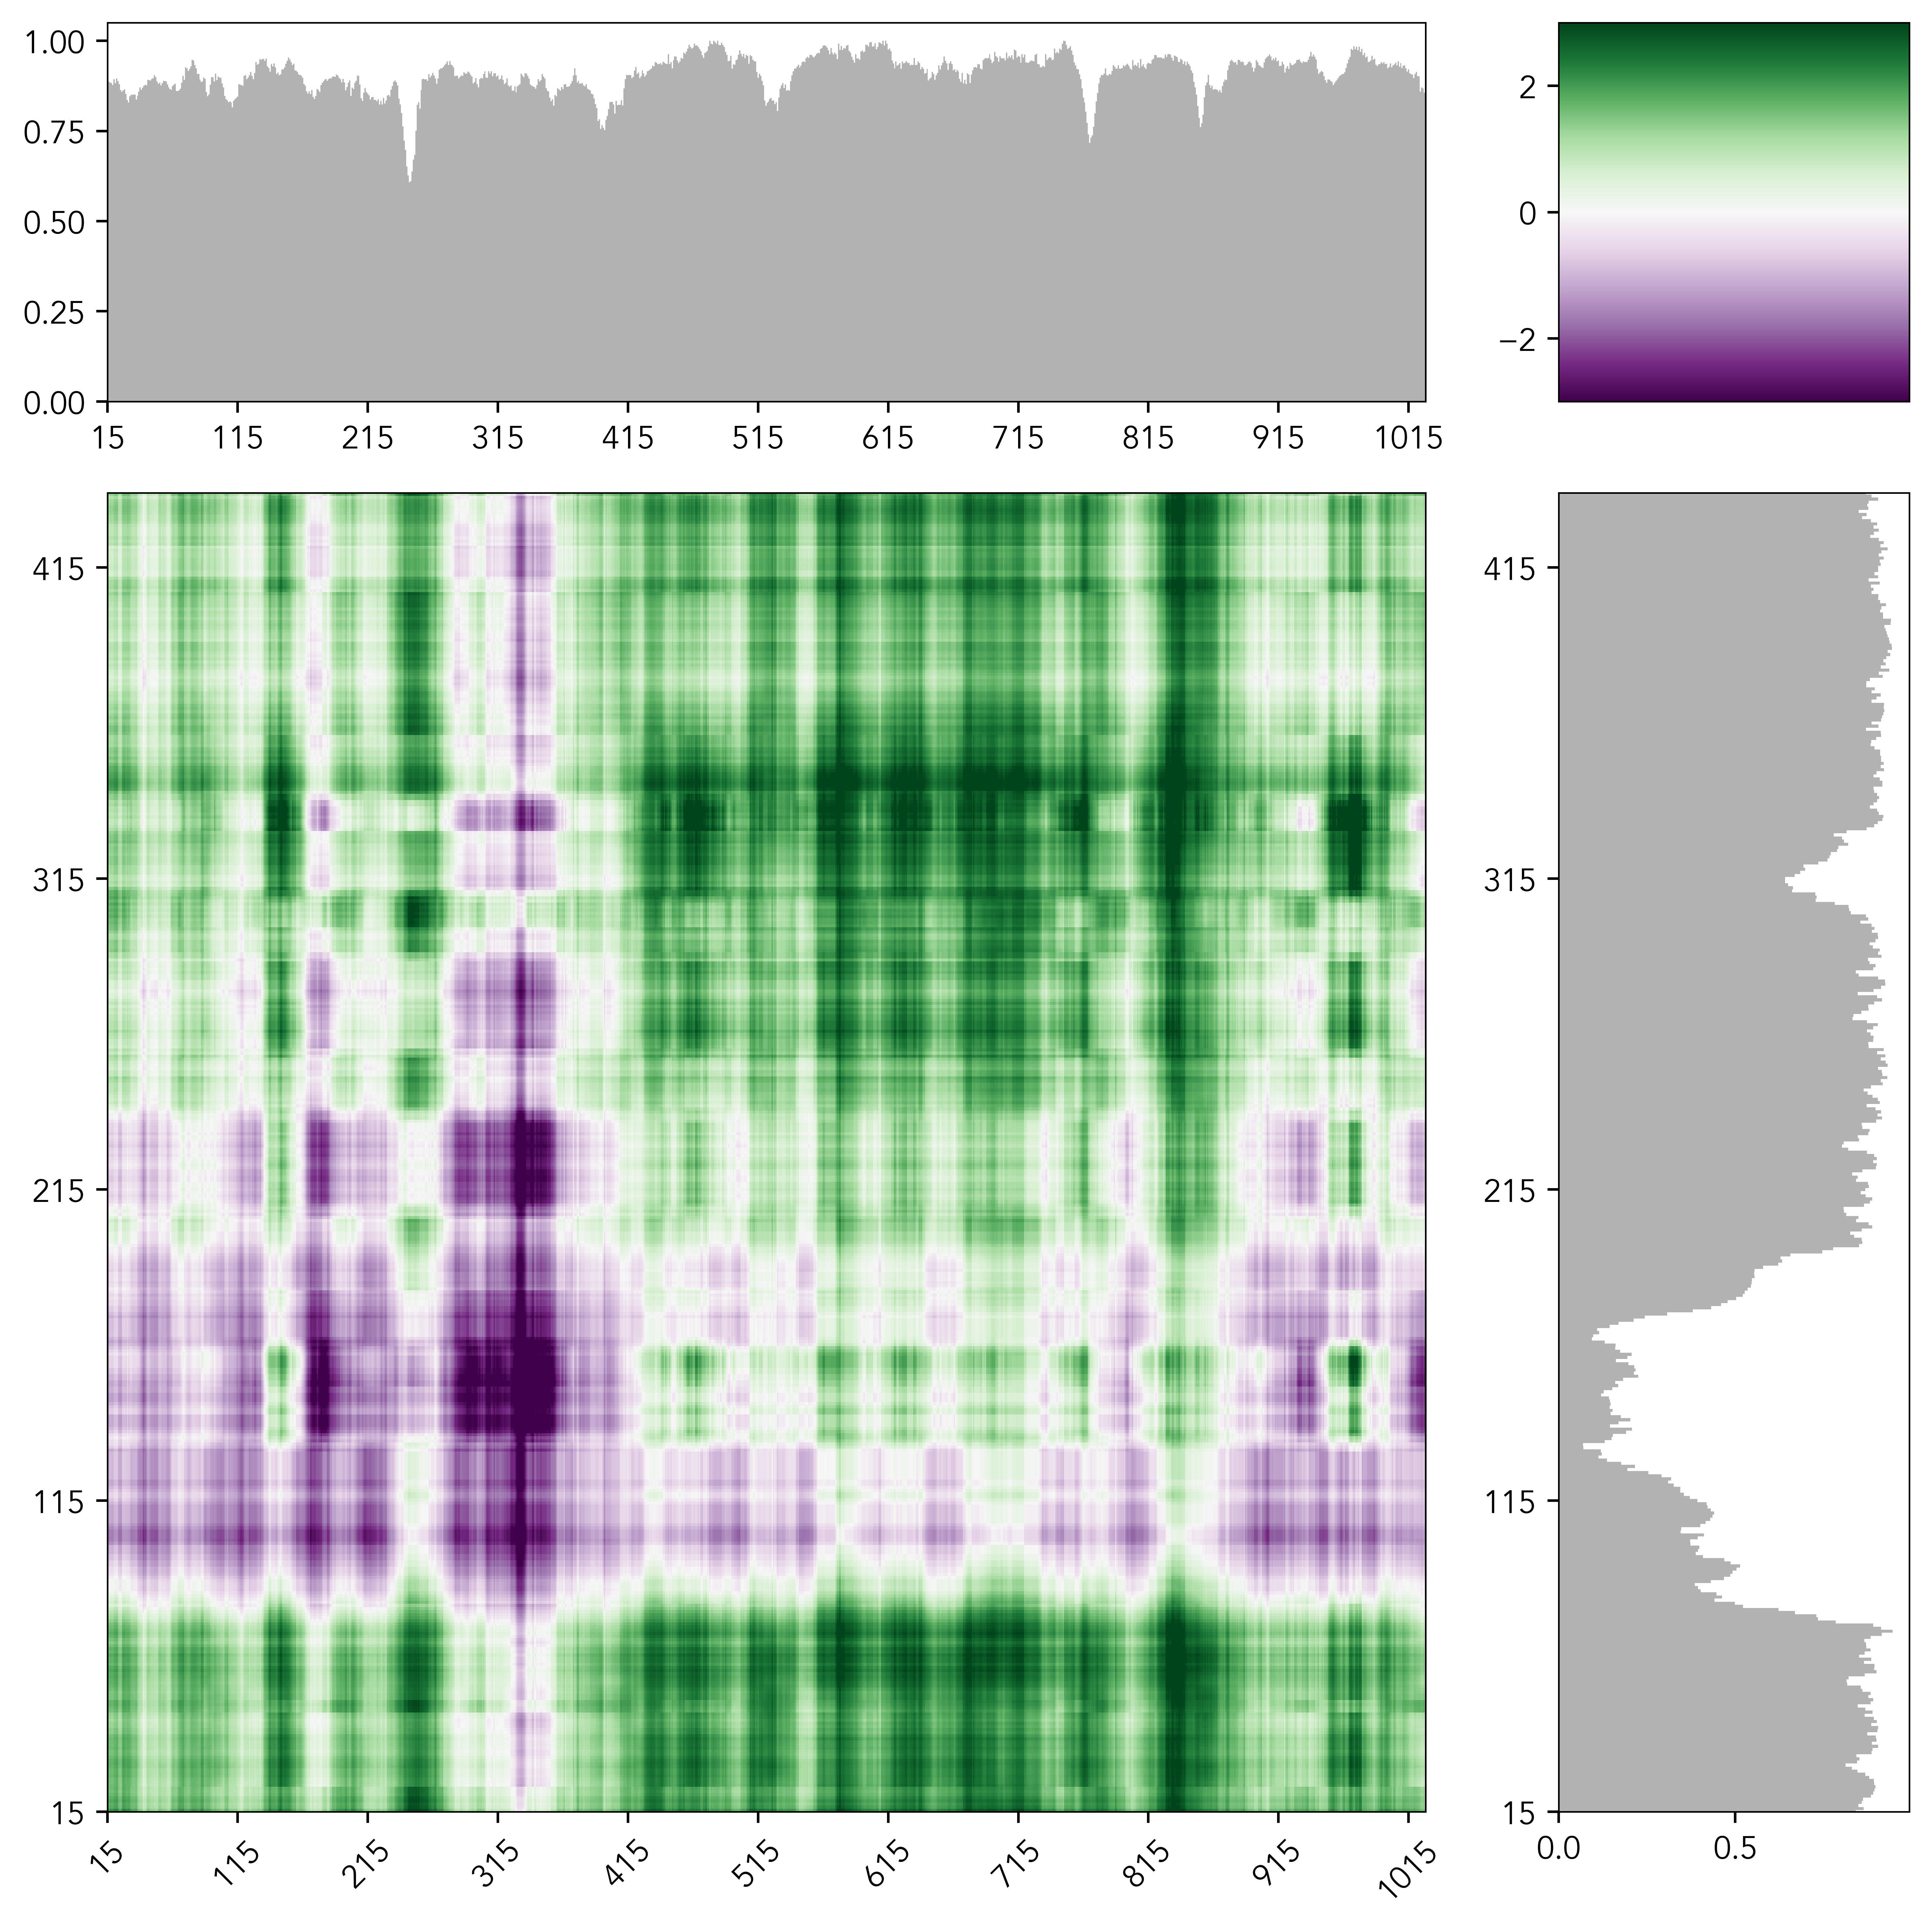

In [5]:
# homotypic interaction
X = mpipi_frontend.interaction_figure(med1_idr, med15_idr, tic_frequency=100)


## Attractive vector (homotypic) 
The analysis below asks, "which regions in sequence 1 (here, med1-idr)" interact favourable with (any) parts of seq2 (here also med1-idr)" basically this is summing and averaging ONLY over attractive elements in the per-residue interaction matrix.

Compare a couple of window sizes

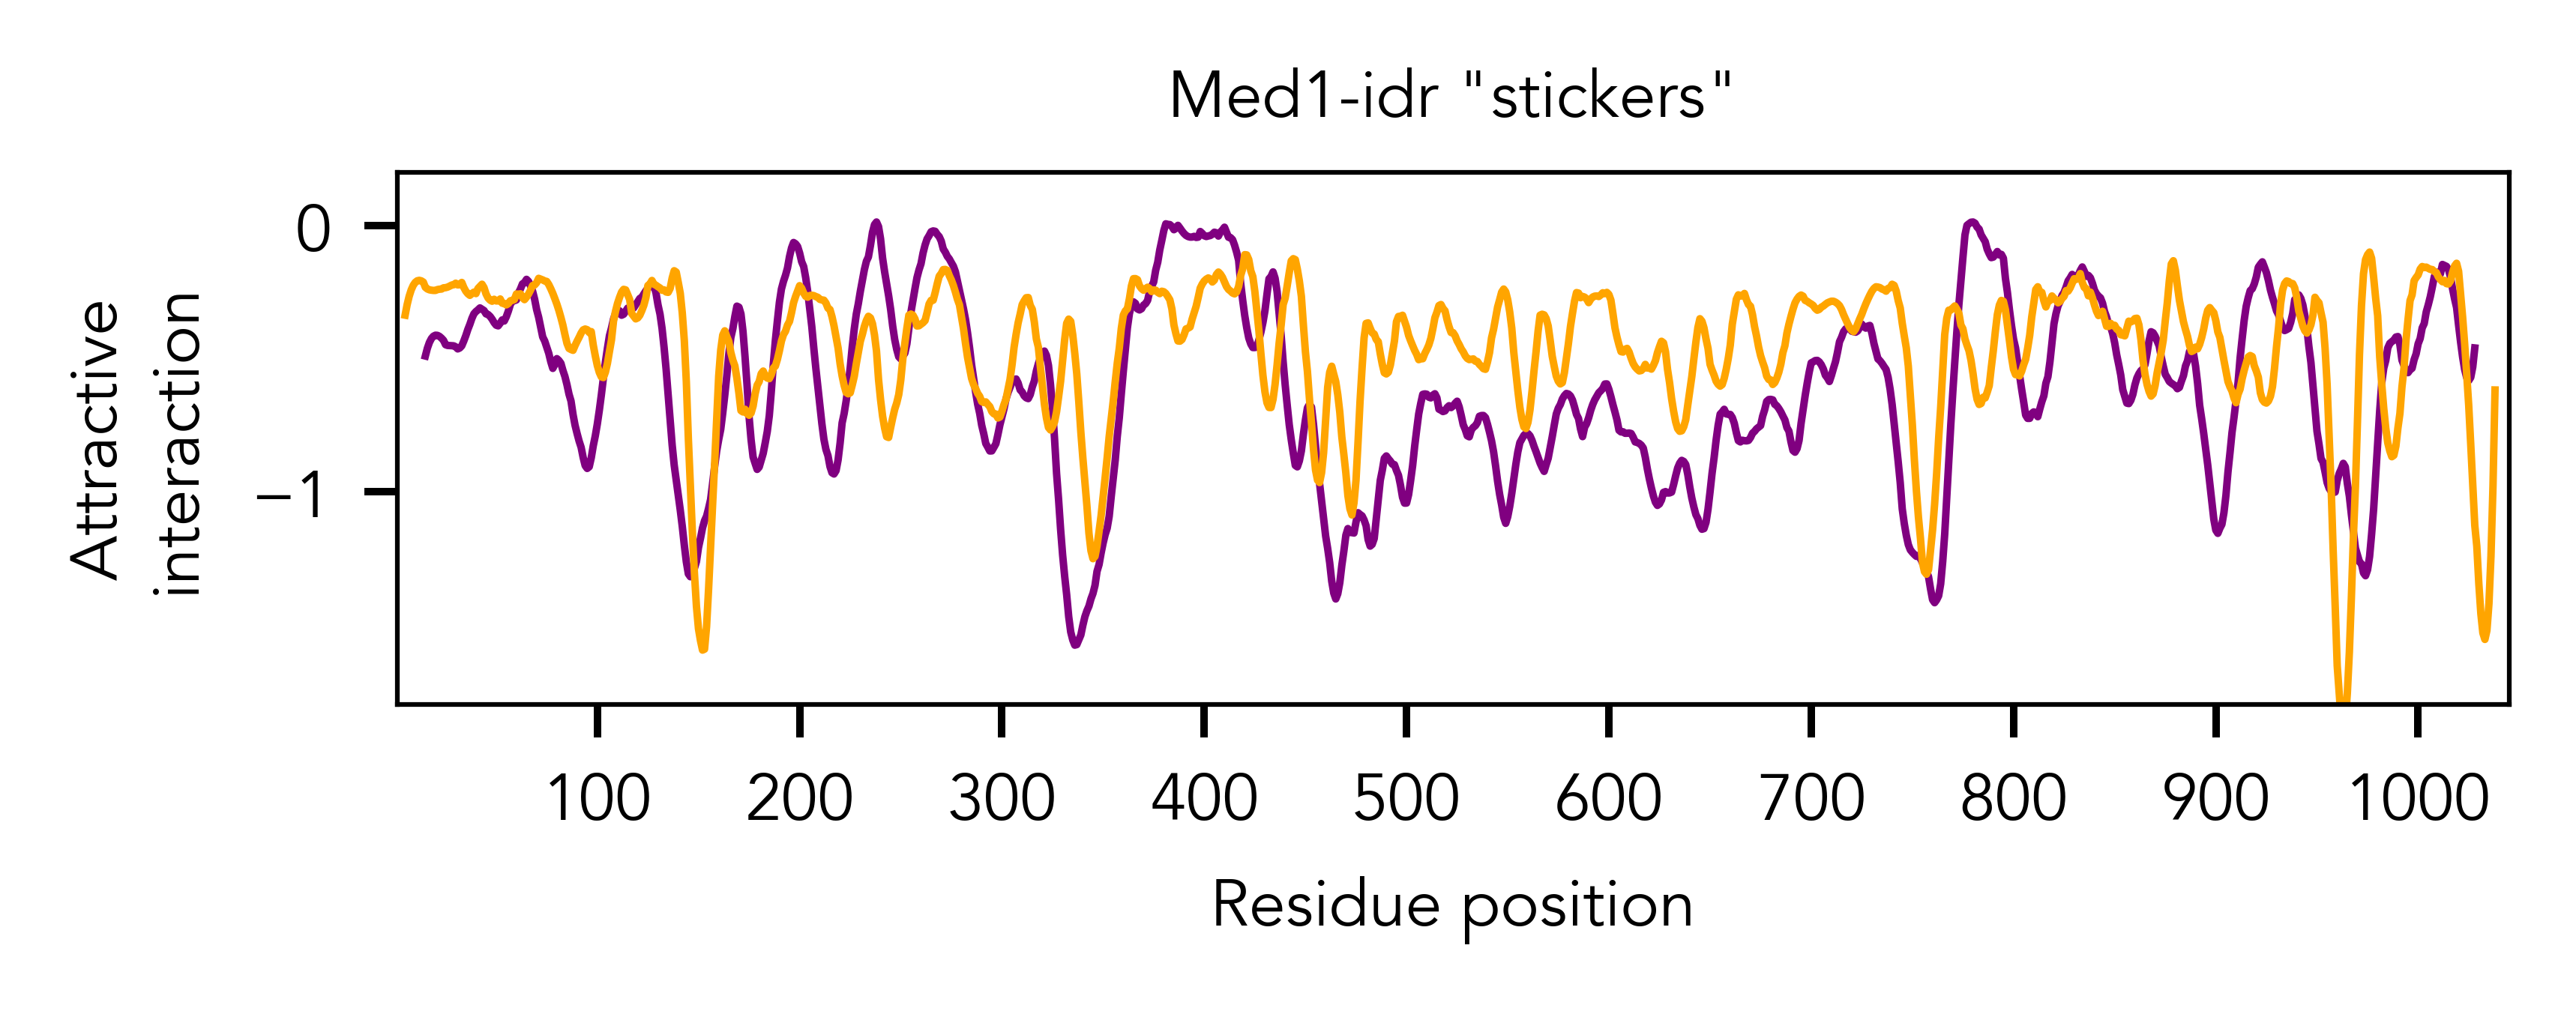

In [6]:
# sox2
seq = med1_idr

# 31 residue window size (default); nb this also gets smoothed using a savgol filter by default
[idx_31, vals_31] = mpipi_frontend.per_residue_attractive_vector(seq, seq, window_size=31)

# 15 residue window ; nb this also gets smoothed using a savgol filter by default
[idx_10, vals_10] = mpipi_frontend.per_residue_attractive_vector(seq, seq, window_size=11)


fig = plt.figure(figsize=(4, 1.6), dpi=450)
ax = plt.gca()
plt.plot(idx_31, vals_31, linewidth=0.8, color='purple', label='ws=31')
plt.plot(idx_10, vals_10, linewidth=0.8, color='orange', label='ws=10')



# hacky way to get gene name but seems to work in general
plt.title('Med1-idr "stickers"', fontsize=7)
plt.ylabel('Attractive\ninteraction', fontsize=7)
plt.xlabel('Residue position', fontsize=7)
plt.xticks(np.arange(0,len(seq),100),fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([1, len(seq)+1])
plt.ylim([-1.8,0.2])

# ensure axis are on top
for spine in ax.spines.values():
    spine.set_zorder(30)


plt.tight_layout()

## Attractive vector  (heterotypic)
The analysis below asks, "which regions in sequence 1 (here, med1-IDR)" interact favourable with (any) parts of seq2 (here med15-idr)" basically this is summing and averaging ONLY over attractive elements in the per-residue interaction matrix.

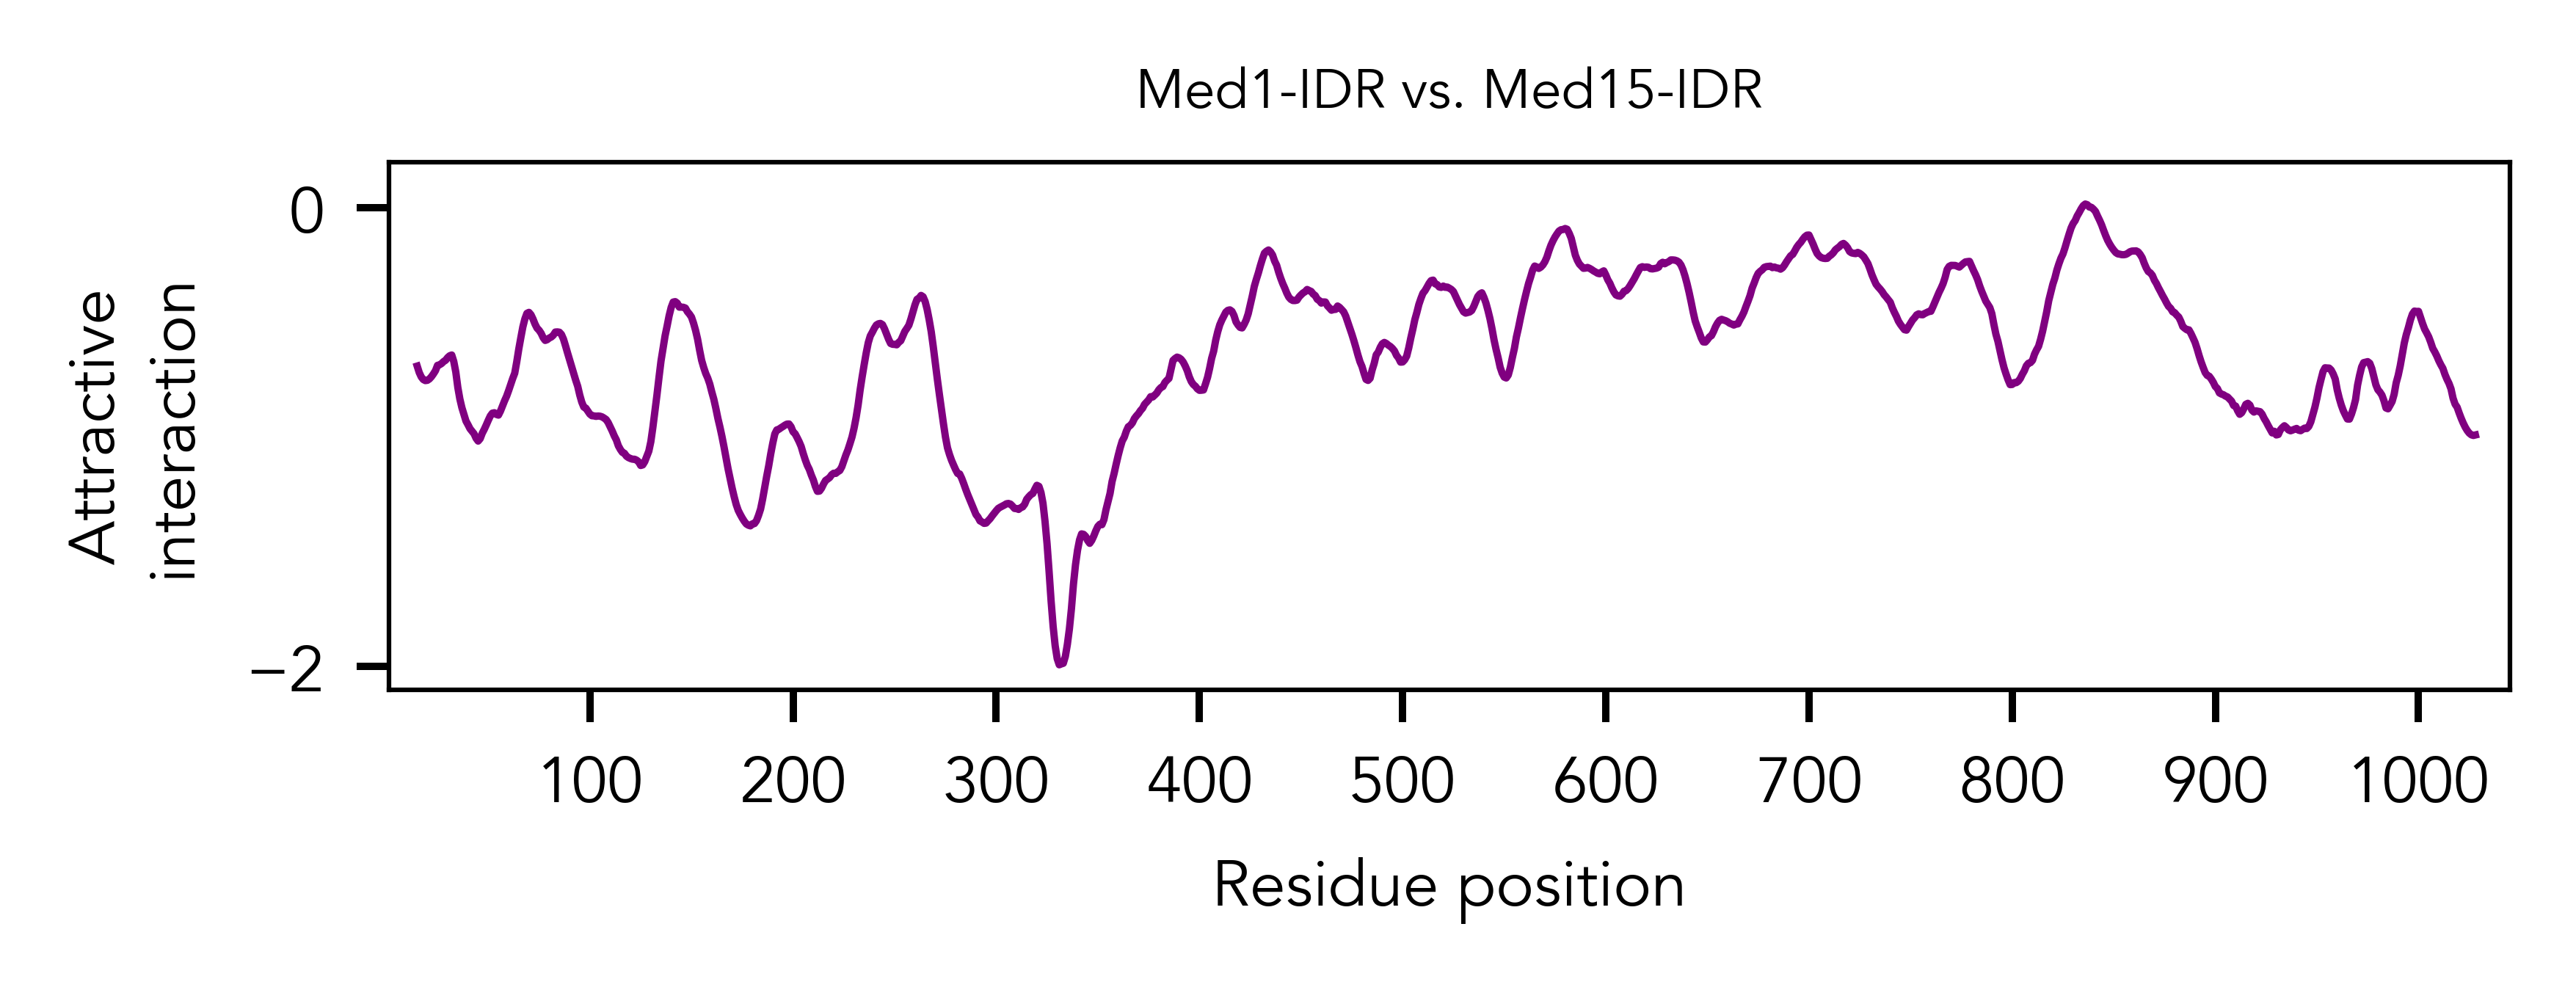

In [7]:
# sox2

seq1 = med1_idr

# oct4
seq2 = med15_idr

# 31 residue window size (default); nb this also gets smoothed using a savgol filter by default
[idx, vals] = mpipi_frontend.per_residue_attractive_vector(seq1, seq2, window_size=31)

fig = plt.figure(figsize=(4, 1.6), dpi=450)
ax = plt.gca()
plt.plot(idx, vals, linewidth=0.8, color='purple', label='ws=31')


plt.title('Med1-IDR vs. Med15-IDR', fontsize=6)
plt.ylabel('Attractive\ninteraction', fontsize=7)
plt.xlabel('Residue position', fontsize=7)
plt.xticks(np.arange(0,len(seq),100),fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([1, len(seq)+1])
plt.ylim([-2.1,0.2])

# ensure axis are on top
for spine in ax.spines.values():
    spine.set_zorder(30)


plt.tight_layout()